# The Spark Foundation # Task 4

### Task :    
#### 1. As a security/defense analyst, have to find out the hot zone of terrorism.
#### 2. Find What all security issues and insights can derive by EDA


### Name : Premalatha S





##### Import Libraries


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [44]:
data = pd.read_csv('globalterrorismdb.csv', encoding='ISO-8859-1')
print('Data Loaded Successfuly!')

Data Loaded Successfuly!


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Exploratory Data Analysis

In [4]:
print('The dataset documents', data.shape[0], 'terror attacks with', data.shape[1], 'different features')

The dataset documents 181691 terror attacks with 135 different features


In [5]:
columns =data.columns
columns
names =[ x for x in columns]
print (names)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

##### Selecting necessary columns to derive insights

In [45]:
data.rename(columns={'eventid': 'ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','success':'Success','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['ID','Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Success','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data.to_csv('New_data.csv')
data.head(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Success,Group,Target_type,Weapon_type,Motive,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,1,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,1,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,1,Unknown,Journalists & Media,Unknown,NaN,1.0


In [7]:
data.isnull().sum()

ID                  0
Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [8]:
data.describe()

,ID,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [9]:
print('Country with Highest Terrorist Attacks :',data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks :',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are :',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks : Iraq
Regions with Highest Terrorist Attacks : Middle East & North Africa
Maximum people killed in an attack are : 1570.0 that took place in Iraq


## Success of attacks

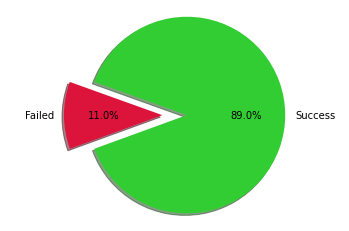

In [47]:
suc = data['Success'].value_counts()
labels = 'Success', 'Failed'
sizes = suc
colors = ['limegreen', 'crimson']
explode = (0.25, 0)
plt.pie(sizes, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.show()

## Number Of Terrorist Activities Each Year

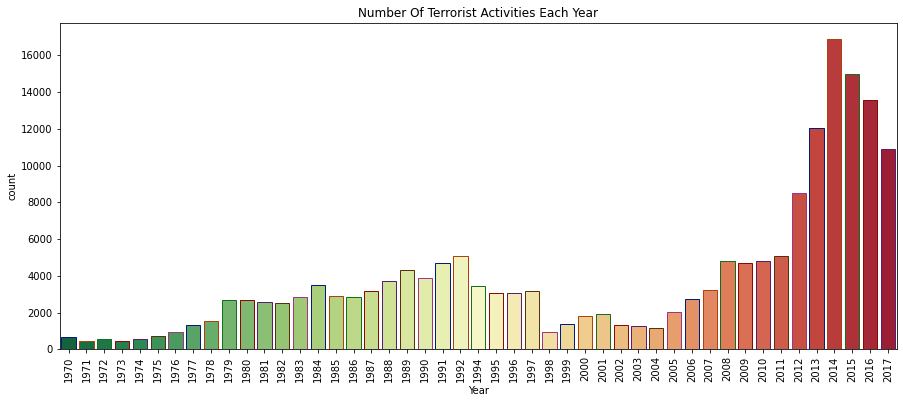

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Death, Wounded and Casualties by Region

In [11]:
region_wise = data[['Region','Killed','Wounded','casualities']].copy()
region_wise = region_wise.groupby(by=['Region']).sum()
region_wise.sort_values('Killed',ascending=False).style.background_gradient(cmap='Reds')

,Killed,Wounded,casualities
Region,,,
Middle East & North Africa,137642.000000,214308.000000,329807.000000
South Asia,101319.000000,141360.000000,234366.000000
Sub-Saharan Africa,78386.000000,52857.000000,108990.000000
South America,28849.000000,16704.000000,43562.000000
Central America & Caribbean,28708.000000,8991.000000,34530.000000
Southeast Asia,15637.000000,26259.000000,40841.000000
Eastern Europe,7415.000000,12045.000000,18239.000000
Western Europe,6694.000000,18332.000000,22778.000000
North America,4916.000000,21531.000000,26398.000000


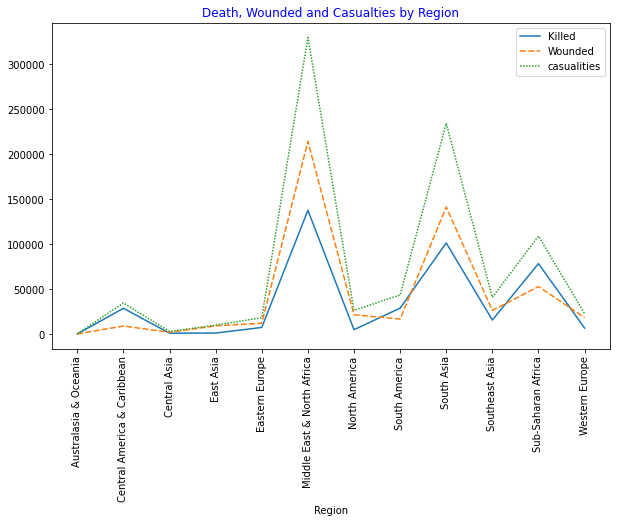

In [12]:
plt.subplots(figsize=(10,6))
sns.lineplot(data=region_wise)
plt.xticks(rotation=90)
plt.title('Death, Wounded and Casualties by Region', color='b')
plt.show()

## Number of attacks by year and region

In [13]:
year_reg = data.groupby(['Region','Year']).size().reset_index().rename(columns={0:'count'})

regions =year_reg.Region.unique() 
regions

years= year_reg.Year.unique()
years

year_reg

,Region,Year,count
0,Australasia & Oceania,1970,1
1,Australasia & Oceania,1971,1
2,Australasia & Oceania,1972,8
3,Australasia & Oceania,1973,1
4,Australasia & Oceania,1974,1
...,...,...,...
524,Western Europe,2013,261
525,Western Europe,2014,215
526,Western Europe,2015,333
527,Western Europe,2016,273


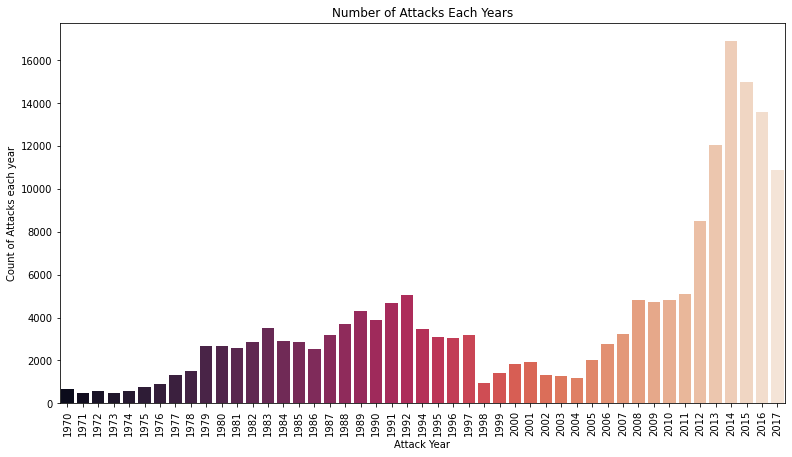

In [14]:
x_year = data.Year.unique()
y_count_years = data.Year.value_counts(dropna = False).sort_index()
plt.figure(figsize = (13,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Count of Attacks each year')
plt.title('Number of Attacks Each Years')
plt.show()

As you can see there are lots of attacks. And some of the theirs has very high rates, 
especially attacks reaches the highest values after the 2012 to 2017.

Let's find out the global or national actors of these attacks.

In [15]:
terorism_actors = data.Group.unique()
print(terorism_actors)

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [16]:
attacks_of_groups = []
for name in terorism_actors:
    temp = data.Group[data.Group == name].count()
    attacks_of_groups.append(temp)
    
dataframe_temp = pd.DataFrame({'actor':terorism_actors, 'attack_num':attacks_of_groups})

## Attack by groups

In [17]:
dataframe_temp = dataframe_temp[dataframe_temp.attack_num >= 100]
dataframe_temp.sort_values('attack_num',ascending=False).style.background_gradient(cmap='Reds')

,actor,attack_num
2,Unknown,82782
2001,Taliban,7478
3024,Islamic State of Iraq and the Levant (ISIL),5613
455,Shining Path (SL),4555
478,Farabundo Marti National Liberation Front (FMLN),3351
2699,Al-Shabaab,3288
15,New People's Army (NPA),2772
46,Irish Republican Army (IRA),2671
203,Revolutionary Armed Forces of Colombia (FARC),2487
2819,Boko Haram,2418


## Number of attacks for each target

Text(0.5, 1.0, 'Number of Attacks for Each Target')

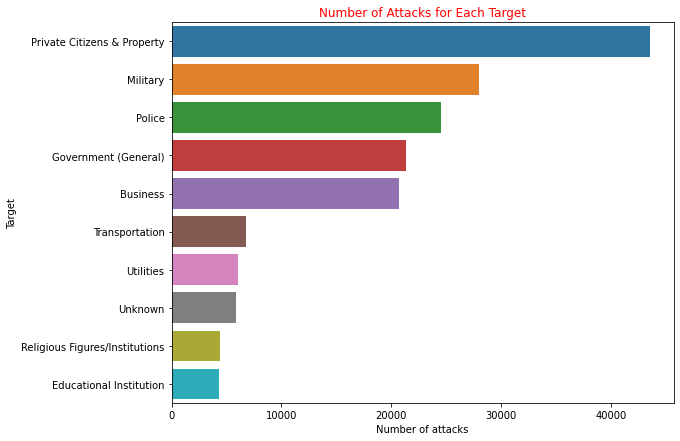

In [18]:
target_temp = data.groupby("Target_type").ID.count().sort_values(ascending=False)[:10]
target_temp = target_temp.reset_index()
target_temp.columns = ["Target", "Number of attacks"]
plt.figure(figsize=(9,7))
sns.barplot(data=target_temp, x=target_temp.columns[1], y=target_temp.columns[0]);
plt.title('Number of Attacks for Each Target', color = 'r')

## Target and Victim groups

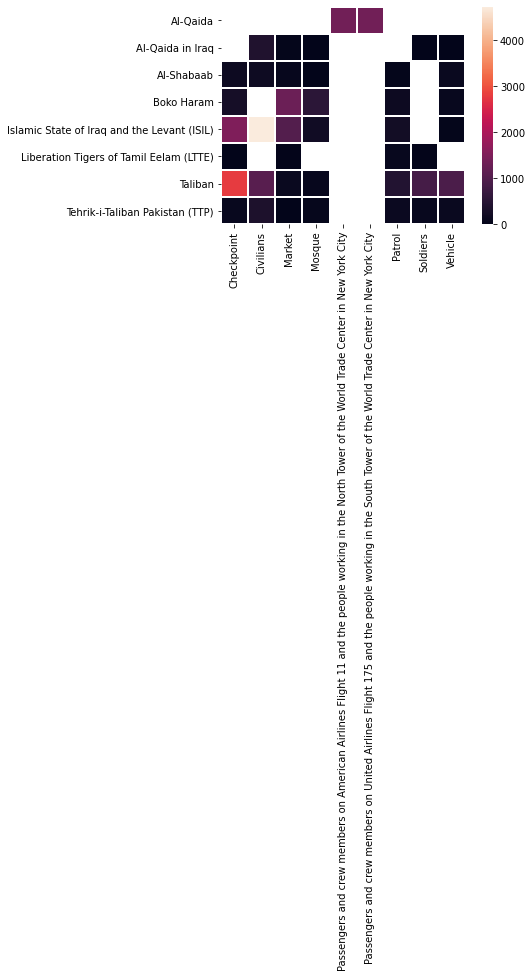

In [19]:
grp_target = data.groupby(["Group", "Target"])[['Killed', 'Wounded']].sum()
grp_target = grp_target.reset_index()
grp_target = grp_target[grp_target.Target != 'Unknown']
grp_target = grp_target[grp_target.Group != 'Unknown']
grp_target = grp_target[grp_target.Group.isin(list(data.groupby("Group").Wounded.sum().sort_values(ascending=False)[:10].index.tolist()))]
grp_target = grp_target[grp_target.Target.isin(list(data.groupby("Target").Wounded.sum().sort_values(ascending=False)[:10].index.tolist()))]


grp_target = grp_target.fillna(0)
grp_target['nvictim'] = grp_target.Killed + data.Wounded
del grp_target['Killed']
del grp_target['Wounded']
sns.heatmap(grp_target.pivot('Group', 'Target', 'nvictim'),square=True, linewidths=1, linecolor='white')
plt.ylabel('')
plt.xlabel('');

<Figure size 864x504 with 0 Axes>

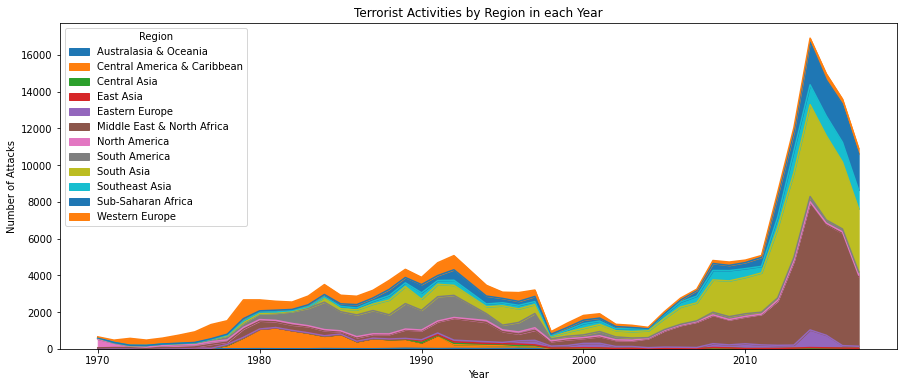

In [20]:
plt.figure(figsize=(12,7))
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

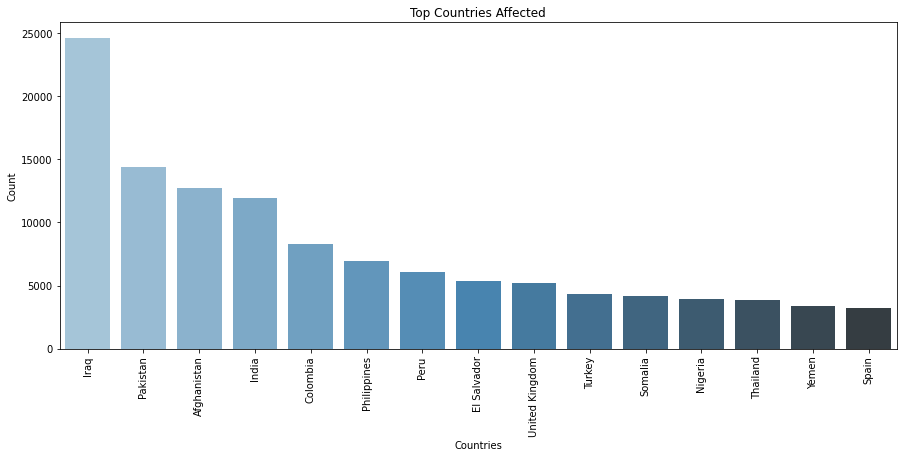

In [21]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Looking at India data

In [35]:
india_attacks = data[data.Country=='India'].reset_index()
india_attacks.head()

,index,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1186,197202220004,1972,2,22,India,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0
1,2764,197501190004,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,4.0
2,3857,197605260001,1976,5,26,India,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,0.0
3,5327,197709280004,1977,9,28,India,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0.0
4,7337,197901130004,1979,1,13,India,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,NaN


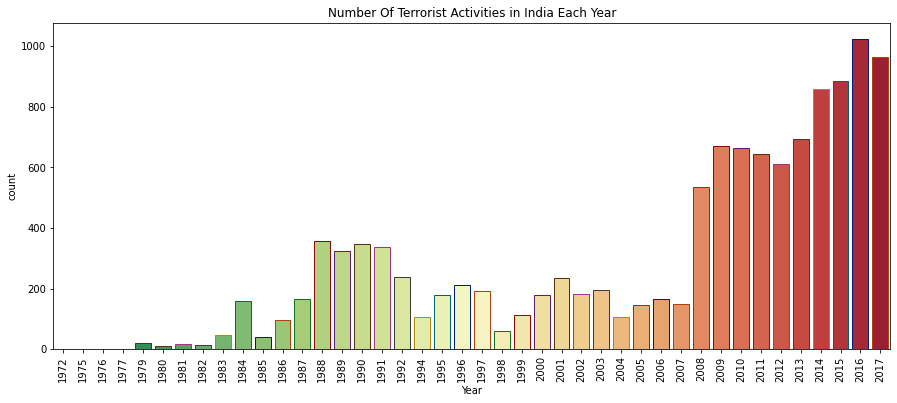

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=india_attacks,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in India Each Year')
plt.show()

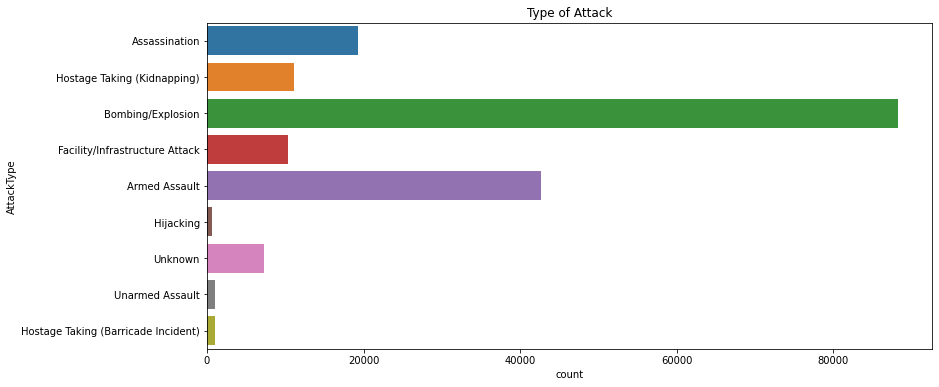

In [22]:
plt.subplots(figsize=(13,6))
sns.countplot(y='AttackType',data=data)
plt.title('Type of Attack')
plt.show()

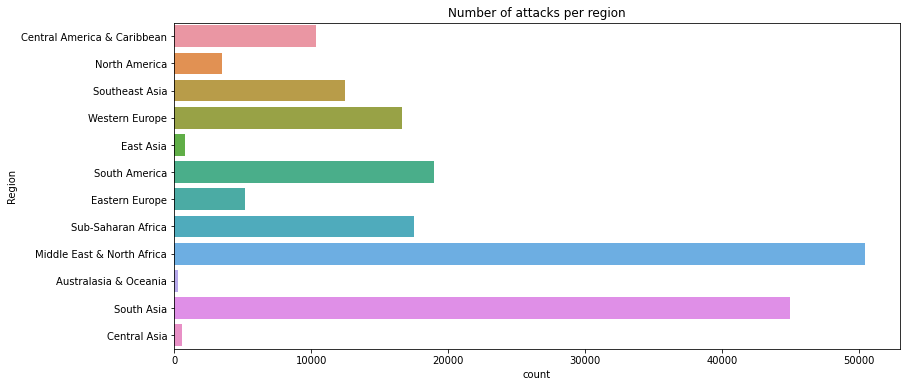

In [23]:
plt.subplots(figsize=(13,6))
sns.countplot(y='Region',data=data)
plt.title('Number of attacks per region')
plt.show()

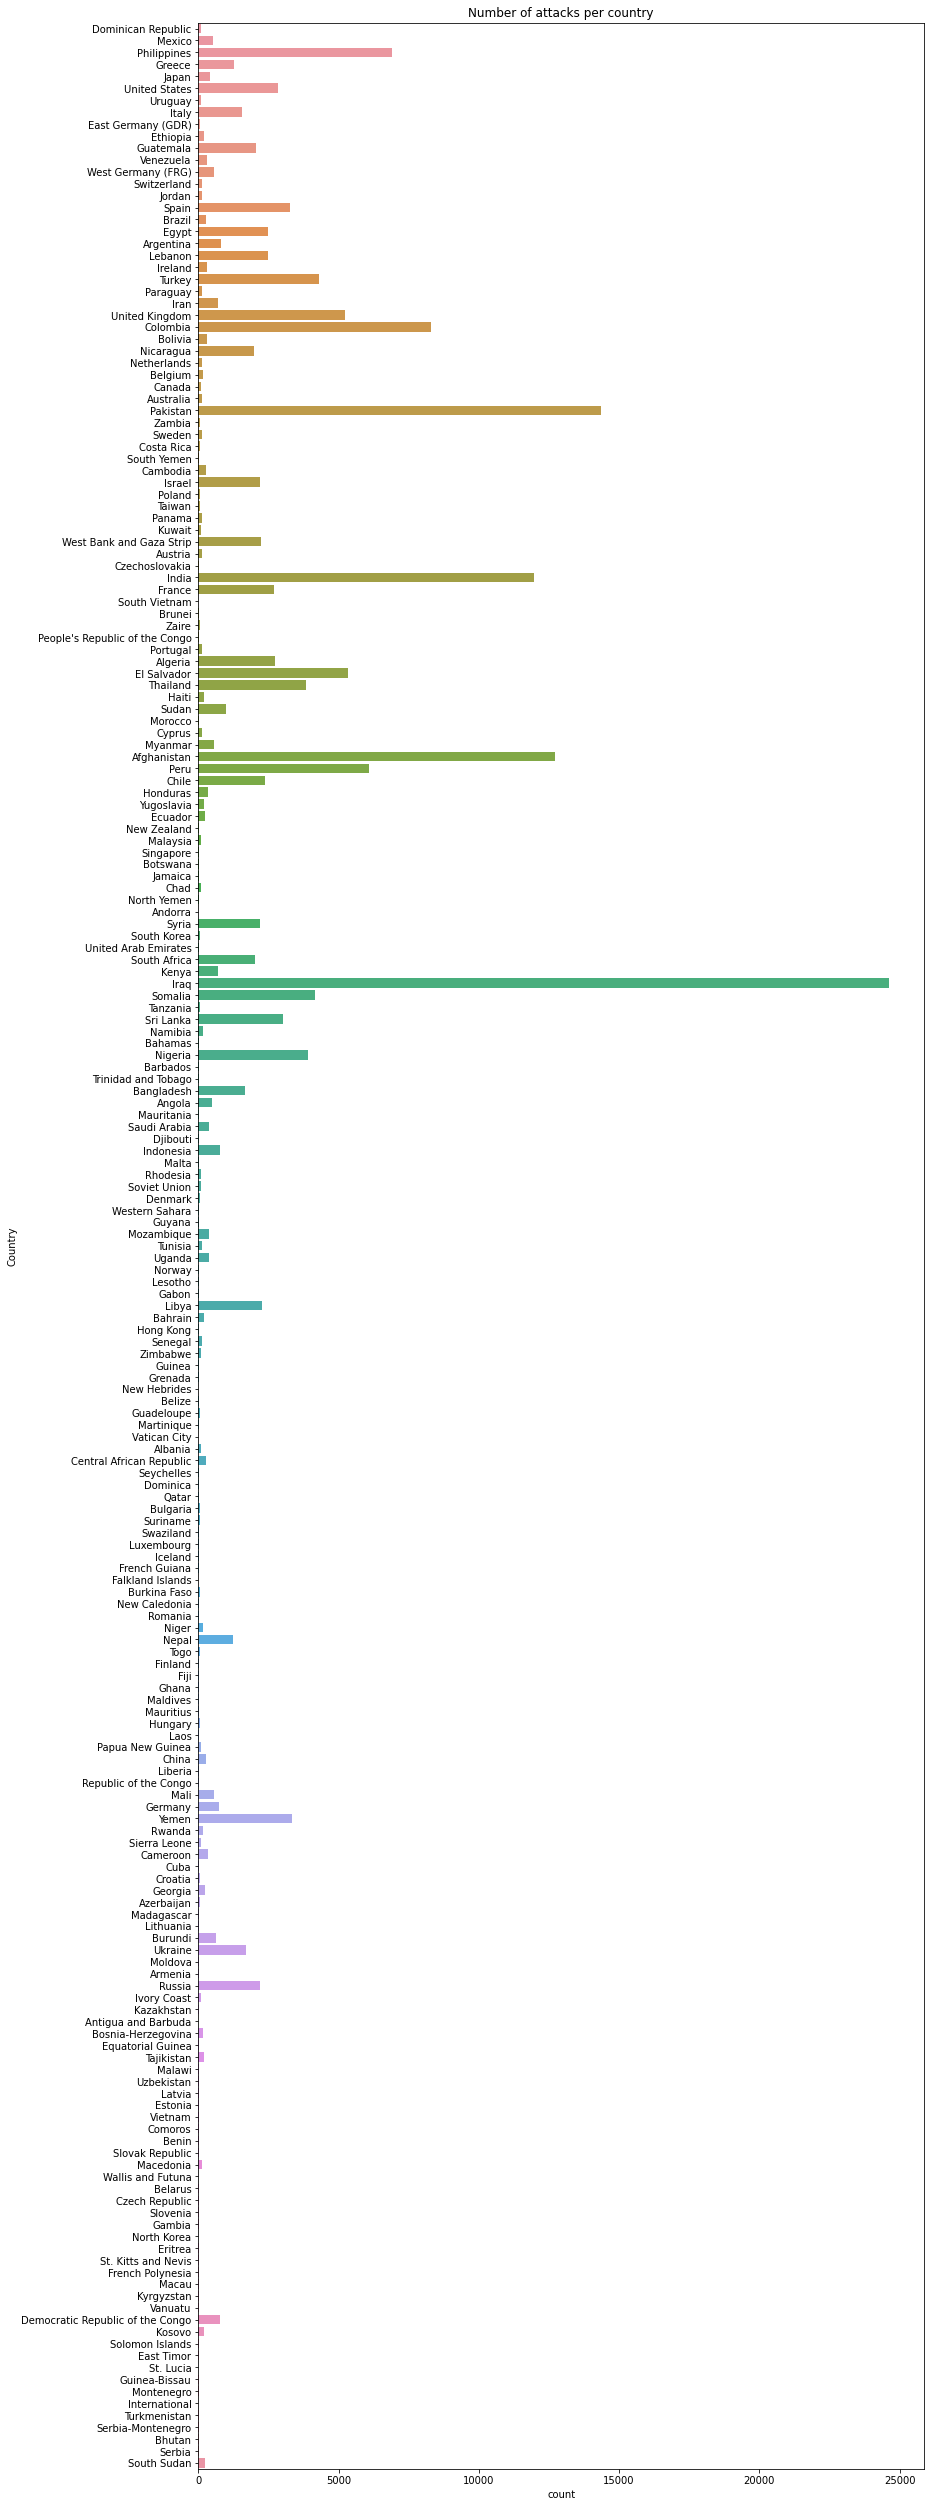

In [24]:
plt.subplots(figsize=(13,45))
sns.countplot(y='Country',data=data)
plt.title('Number of attacks per country')
plt.show()

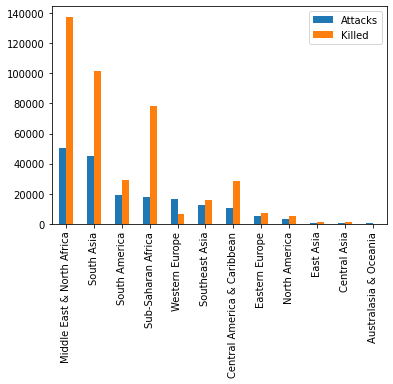

In [25]:
countRegionAttack = data['Region'].value_counts().to_frame()
countRegionAttack.columns=['Attacks']

countRegionKill = data.groupby('Region')['Killed'].sum().to_frame()
countRegionAttack.merge(countRegionKill,
                        left_index=True, 
                        right_index=True).plot.bar()
plt.show()

## Conclustion:
##### 1. Number of Terrorist Activities are very high after the year of 2012 
##### 2. Death, wounded and casualties are very high "Middle East & North Africa" , South Asia & Sub-Saharan Africa.
##### 3. The highest count of attact in the year 2014 ( 50,000+ attacts)
##### 4. The highest attact done by the group of unknown - count of attact is 82782 
##### The second highest attact done by the group of Taliban , the count of attact - 7478
##### 5. Success of attact 89% 
##### 6. The most targeted attact was done to the "Private Citizens & Property"  & Military
##### 7. The most affected country is Irag & Pakistan
##### 8. When we looking at the india's terrorist attact data after 2008 its increased most. Number of attact after 2008 is 500+ per year. the highest attact in the year of 2016 (more than 1000 attact)
##### 9. The Al-Qaida group attacted most in the New york city.
##### 10. The most attact type - Bombing/ Explosion & Armed Assault
##### 11. the highest attact and killed in Middle East and north Africa

    